In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Explore Dataset

In [5]:
sp_artists=pd.read_csv('/content/artists.csv')
sp_tracks=pd.read_csv('/content/tracks.csv')
sp_artists.head()
sp_tracks.head()


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Data Cleaning

In [ ]:

print(pd.isnull(sp_artists).sum())
print(pd.isnull(sp_tracks).sum())


id             0
followers     13
genres         0
name           3
popularity     0
dtype: int64
id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


In [6]:
#dropna
sp_artists.dropna(inplace=True)
sp_tracks.dropna(inplace=True)
print(pd.isnull(sp_artists).sum())
print(pd.isnull(sp_tracks).sum())


id            0
followers     0
genres        0
name          0
popularity    0
dtype: int64
id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


Top 10 Most Followed Artists

In [ ]:

top_artists = sp_artists.sort_values(by="followers", ascending=False).head(10)
print(top_artists[["name", "followers", "popularity"]])
sp_artists[["followers", "popularity"]].corr()
#visualisation
sns.scatterplot(data=sp_artists, x="followers", y="popularity",hue='name', alpha=0.6)
plt.title("Followers vs Popularity")
plt.xlabel("Followers")
plt.ylabel("Popularity")
plt.show()

                   name   followers  popularity
144138       Ed Sheeran  78900234.0          92
144485    Ariana Grande  61301006.0          95
313676            Drake  54416812.0          98
144481    Justin Bieber  44606973.0         100
144488           Eminem  43747833.0          94
313508          Rihanna  42244011.0          92
126658    Billie Eilish  41792604.0          92
126338     Taylor Swift  38869193.0          98
126339  Imagine Dragons  33665795.0          89
144496            Queen  33483326.0          89


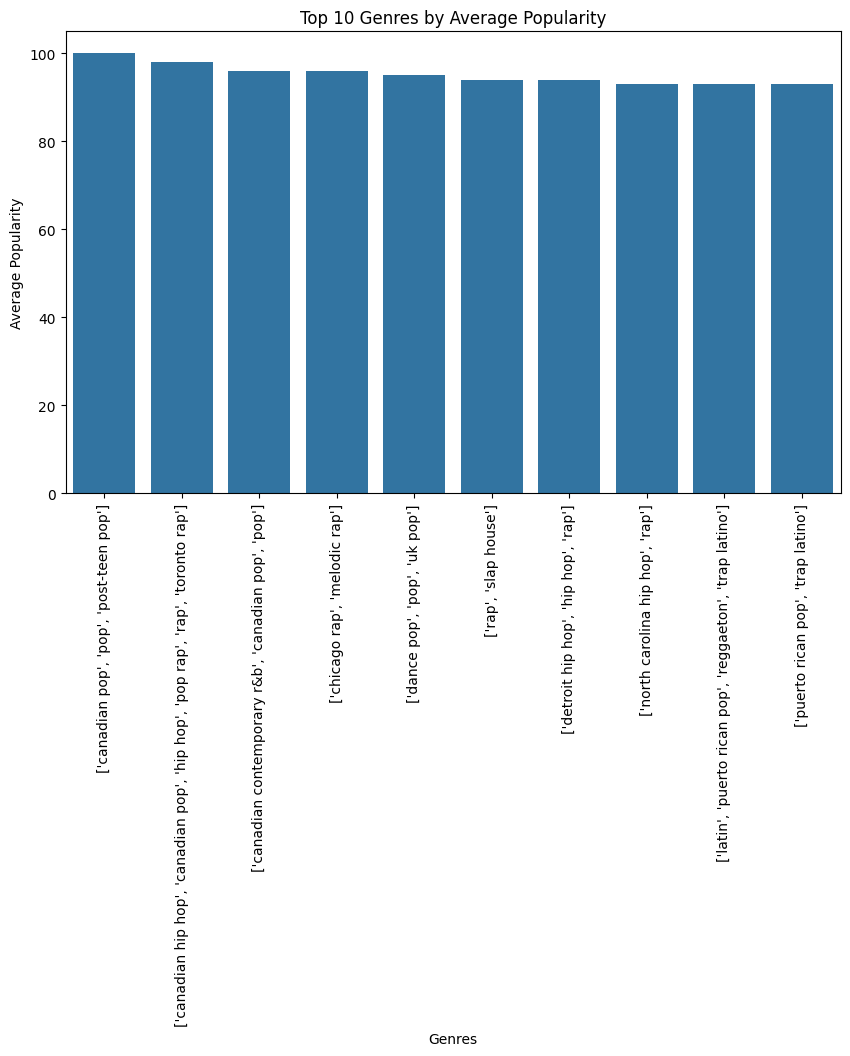

In [ ]:
#Top Genres by Avg Popularity
top_genres = sp_artists.groupby("genres")["popularity"].mean().sort_values(ascending=False).head(10)
#visualise
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.xlabel("Genres")
plt.ylabel("Average Popularity")
plt.title("Top 10 Genres by Average Popularity")
plt.xticks(rotation=90)
plt.show()


Setting Releasing date as Index Column

In [ ]:
sp_tracks.set_index('release_date', inplace=True)
sp_tracks.index = pd.to_datetime(sp_tracks.index, errors='coerce', format='mixed')
years = sp_tracks.index.year
sp_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Visualization: Pearson Correlation Heatmap for Two Variables

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'duration_ms'),
 Text(2.5, 0, 'explicit'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'key'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'mode'),
 Text(8.5, 0, 'speechiness'),
 Text(9.5, 0, 'acousticness'),
 Text(10.5, 0, 'instrumentalness'),
 Text(11.5, 0, 'liveness'),
 Text(12.5, 0, 'valence'),
 Text(13.5, 0, 'tempo'),
 Text(14.5, 0, 'time_signature')]

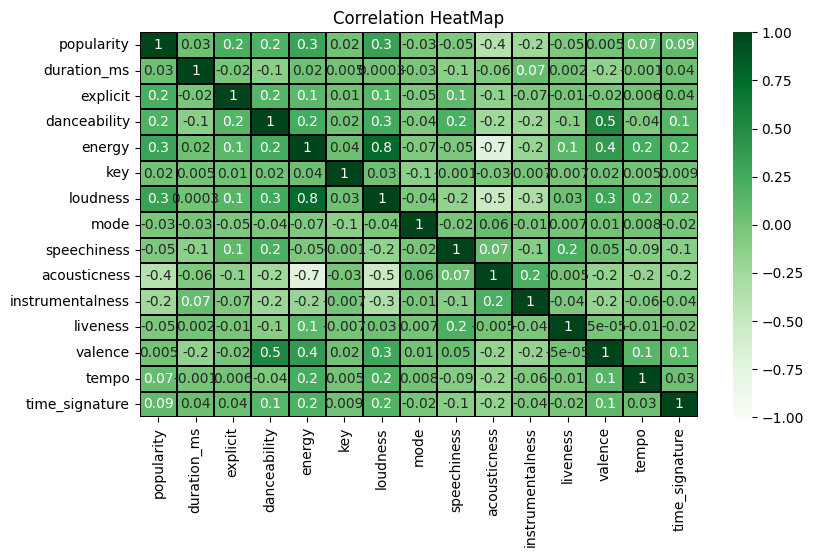

In [ ]:
td = sp_tracks.select_dtypes(include='number').corr(method='pearson')
plt.figure(figsize=(9,5))
hmap = sns.heatmap(td, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='Greens', linewidths=0.1, linecolor='black')
hmap.set_title('Correlation HeatMap')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=90)

Audio Features vs Popularity

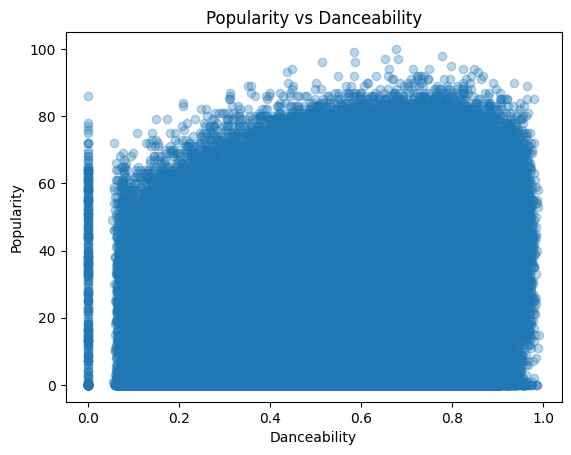

In [ ]:
plt.scatter(sp_tracks["danceability"], sp_tracks["popularity"], alpha=0.3)
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.title("Popularity vs Danceability")
plt.show()


Energy Vs Valence

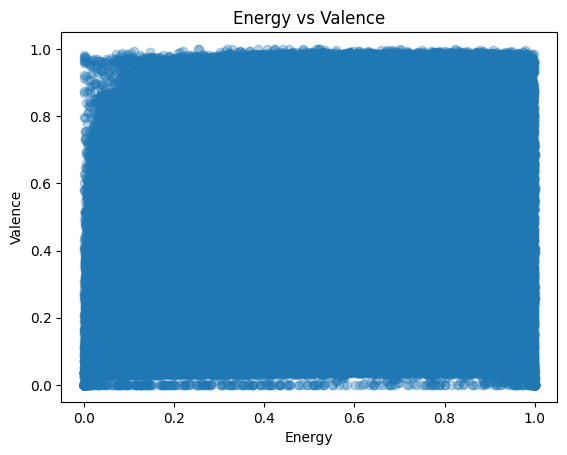

In [ ]:
#Energy vs Valence
plt.scatter(sp_tracks["energy"], sp_tracks["valence"], alpha=0.3)
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.title("Energy vs Valence")
plt.show()

Regression Plot of Loudness vs. Energy with Regression Line

23464


[Text(0.5, 1.0, 'Regression Plot - Loudness vs Energy Correlation')]

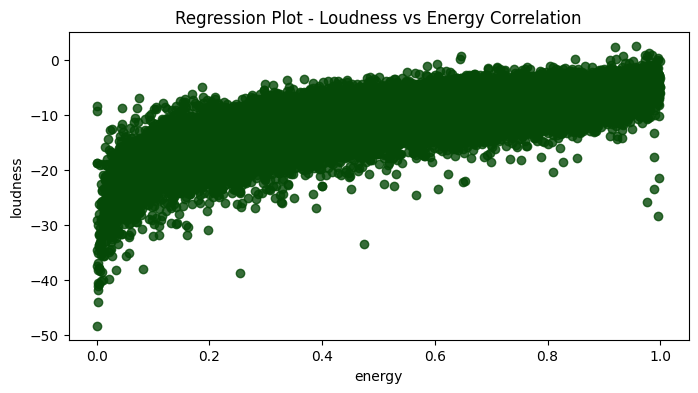

In [ ]:
sample_sp=sp_tracks.sample(int(0.04*len(sp_tracks)))
print(len(sample_sp))
plt.figure(figsize=(8,4))
sns.regplot(data=sample_sp, y='loudness', x='energy', color='#054907').set(title='Regression Plot - Loudness vs Energy Correlation')

 Regression Plot of Popularity vs. Acousticness with Regression Line

[Text(0.5, 1.0, 'Regression Plot - Popularity vs Acousticness Correlation')]

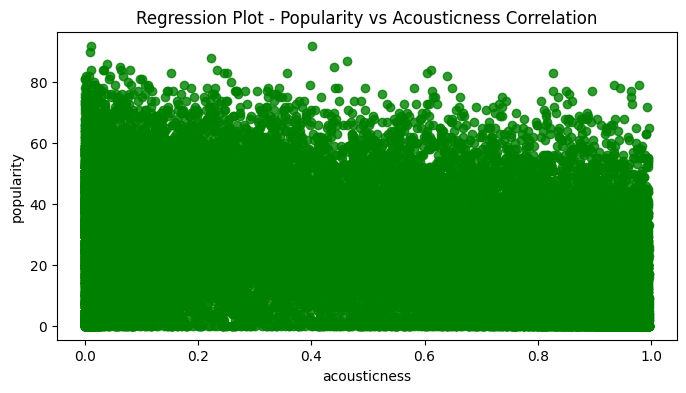

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(data=sample_sp, y='popularity', x='acousticness', color='#008000').set(title='Regression Plot - Popularity vs Acousticness Correlation')

Duration of Songs Over each Year

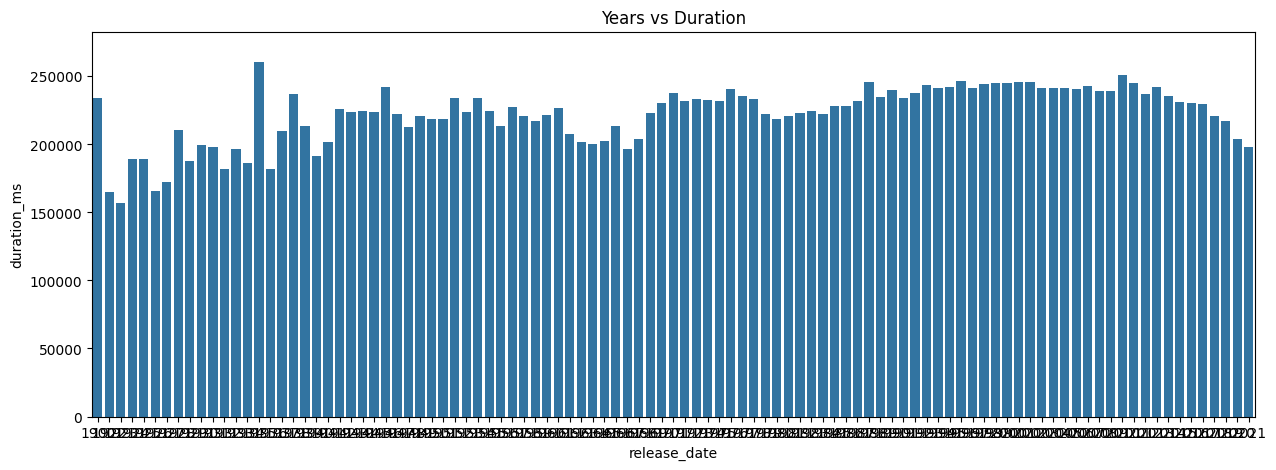

In [ ]:
# Visualise Duration of songs over each year
total_dr = sp_tracks.duration_ms
fig_dims = (15,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x = years, y = total_dr, ax = ax, err_kws={'linewidth': False}).set(title='Years vs Duration')

Line chart of average popularity per year

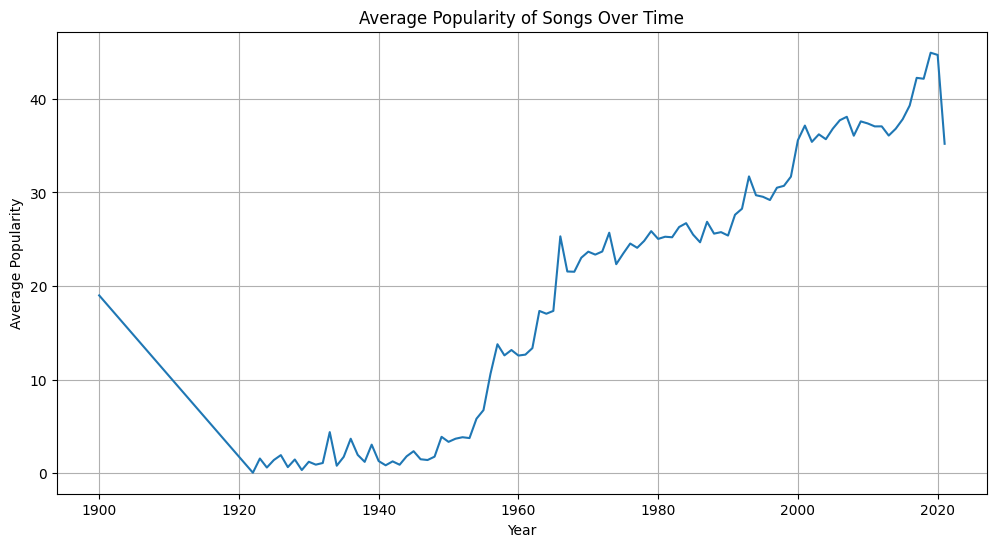

In [ ]:
# Calculate average popularity per year
avg_popularity_per_year = sp_tracks.groupby(sp_tracks.index.year)['popularity'].mean()

# Visualize average popularity per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_popularity_per_year.index, y=avg_popularity_per_year.values)
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.title("Average Popularity of Songs Over Time")
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


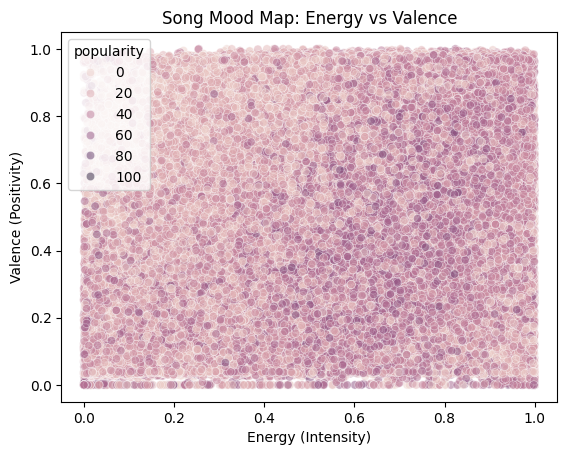

In [ ]:
sns.scatterplot(data=sp_tracks, x="energy", y="valence", hue="popularity", alpha=0.5)
plt.title("Song Mood Map: Energy vs Valence")
plt.xlabel("Energy (Intensity)")
plt.ylabel("Valence (Positivity)")
plt.show()

Mood column to track Data

                                  name  energy  valence               mood
0                                Carve  0.4450    0.127  Sad / Melancholic
1  Capítulo 2.16 - Banquero Anarquista  0.2630    0.655     Calm / Relaxed
2   Vivo para Quererte - Remasterizado  0.1770    0.457  Sad / Melancholic
3        El Prisionero - Remasterizado  0.0946    0.397  Sad / Melancholic
4                  Lady of the Evening  0.1580    0.196  Sad / Melancholic


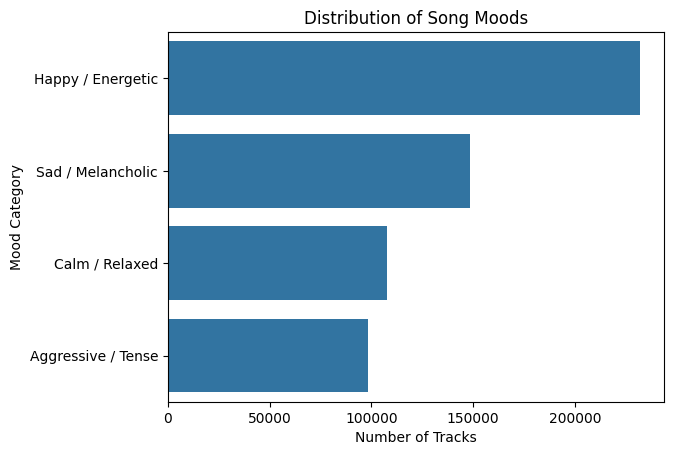

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


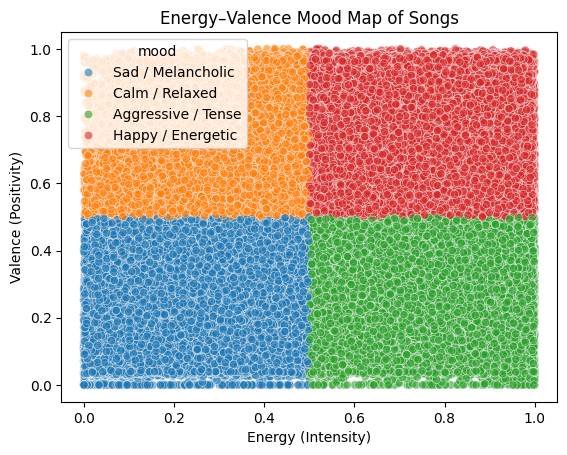

In [ ]:
import pandas as pd

# Load the cleaned tracks dataset
tracks = pd.read_csv("tracks_cleaned.csv")

# Define function to classify mood
def classify_mood(row):
    energy = row['energy']
    valence = row['valence']

    if energy >= 0.5 and valence >= 0.5:
        return 'Happy / Energetic'
    elif energy < 0.5 and valence >= 0.5:
        return 'Calm / Relaxed'
    elif energy < 0.5 and valence < 0.5:
        return 'Sad / Melancholic'
    elif energy >= 0.5 and valence < 0.5:
        return 'Aggressive / Tense'
    else:
        return 'Undefined'

# Apply the function
tracks['mood'] = tracks.apply(classify_mood, axis=1)

# Preview
print(tracks[['name', 'energy', 'valence', 'mood']].head())
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y='mood', data=tracks, order=tracks['mood'].value_counts().index)
plt.title("Distribution of Song Moods")
plt.xlabel("Number of Tracks")
plt.ylabel("Mood Category")
plt.show()
sns.scatterplot(data=tracks, x='energy', y='valence', hue='mood', alpha=0.6)
plt.title("Energy–Valence Mood Map of Songs")
plt.xlabel("Energy (Intensity)")
plt.ylabel("Valence (Positivity)")
plt.show()
